In [1]:
import pandas as pd

from eoles.utils import get_config, process_heating_need
from eoles.process_cost_efficiency import piecewise_linearization_cost_efficiency
from eoles.model_heat_coupling import ModelEOLES
import logging

from project.model import get_inputs, social_planner  # imports from ResIRF package
import datetime
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# set seaborn style
sns.set_theme()

In [2]:
config = get_config(spec="greenfield")

LOG_FORMATTER = '%(asctime)s : %(name)s  : %(funcName)s : %(levelname)s : %(message)s'
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
# consoler handler
console_handler = logging.StreamHandler()
console_handler.setFormatter(logging.Formatter(LOG_FORMATTER))
logger.addHandler(console_handler)

In [3]:
dict_cost, dict_heat = social_planner(aggregation_archetype=['Performance', 'Housing type'], climate=2006, smooth=False, building_stock="medium_3")
dict_heat = process_heating_need(dict_heat, climate=2006)
linearized_renovation_costs, threshold_linearized_renovation_costs = piecewise_linearization_cost_efficiency(dict_cost, number_of_segments=3, plot=False)

2022-11-22 09:27:02,951 - 19690 - log_ - INFO - Creating AgentBuildings object
/Users/celia/miniforge3/envs/envEOLES/lib/python3.10/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [35]:
sum([dict_heat[a].sum() for a in dict_heat.keys()])

192018.42898243913

In [4]:
linearized_renovation_costs

('A', 'Multi-family')_0       0.049938
('A', 'Multi-family')_1       0.299982
('A', 'Multi-family')_2       0.300695
('B', 'Multi-family')_0       0.722854
('B', 'Multi-family')_1      11.520285
('B', 'Multi-family')_2      30.607704
('B', 'Single-family')_0     21.312373
('B', 'Single-family')_1     41.937648
('B', 'Single-family')_2    103.093791
('C', 'Multi-family')_0      10.721958
('C', 'Multi-family')_1      84.209451
('C', 'Multi-family')_2     159.339855
('C', 'Single-family')_0     82.424445
('C', 'Single-family')_1    175.990409
('C', 'Single-family')_2    339.490787
('D', 'Multi-family')_0      22.288162
('D', 'Multi-family')_1     101.140153
('D', 'Multi-family')_2     222.342464
('D', 'Single-family')_0    216.038595
('D', 'Single-family')_1    472.362022
('D', 'Single-family')_2    926.572670
('E', 'Multi-family')_0      15.063999
('E', 'Multi-family')_1      30.726597
('E', 'Multi-family')_2     166.463474
('E', 'Single-family')_0     85.103834
('E', 'Single-family')_1 

In [5]:
list_scc = [0, 100, 200, 300, 400, 500]
list_social_cost = []
list_technical_cost = []
list_emissions = []
list_primary_production = []
list_heat_generation = []
renovation_rate_df = pd.DataFrame()
reindex_primary_prod = ["offshore_f", "offshore_g", "onshore", "pv_g", "pv_c", "river", "lake", "nuc", "biogas1", "biogas2", "pyrogazification", "natural_gas"]
reindex_heat_prod = ["resistive", "heat_pump", "gas_boiler", "fuel_boiler", "wood_boiler"]

for scc in list_scc:
    print(f"Social cost of carbon: {scc}")
    m_scc = ModelEOLES(name="test", config=config, path="eoles/outputs", logger=logger, nb_years=1, heating_demand=dict_heat, nb_linearize=3,
                       linearized_renovation_costs=linearized_renovation_costs, threshold_linearized_renovation_costs=threshold_linearized_renovation_costs,
                       social_cost_of_carbon=scc, year=2050)
    m_scc.build_model()
    solver_results, status, termination_condition = m_scc.solve(solver_name="gurobi")

    list_social_cost.append(m_scc.objective)
    list_technical_cost.append(m_scc.technical_cost)
    list_emissions.append(m_scc.emissions)

    list_primary_production.append(m_scc.primary_generation.reindex(reindex_primary_prod).to_list())
    list_heat_generation.append(m_scc.heat_generation.reindex(reindex_heat_prod).to_list())
    renovation_rate_df = pd.concat([renovation_rate_df, m_scc.renovation_rates.to_frame().transpose()], axis=0, ignore_index=True)

Social cost of carbon: 0


2022-11-22 09:28:09,699 : __main__  : solve : INFO : Solving EOLES model using gurobi
2022-11-22 09:28:43,178 : __main__  : solve : INFO : Optimization successful
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:802: RuntimeWarning: invalid value encountered in double_scalars
  lcoe_CH4_volume = (costs_elec_to_CH4 + costs_CH4_to_demand) / CH4_demand_tot  # € / MWh
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:846: RuntimeWarning: invalid value encountered in double_scalars
  lcoe_CH4_value = (costs_elec_to_CH4_value + costs_CH4_to_demand_value) / CH4_demand_tot  # € / MWh


Social cost of carbon: 100


2022-11-22 09:28:59,589 : __main__  : solve : INFO : Solving EOLES model using gurobi
2022-11-22 09:29:38,453 : __main__  : solve : INFO : Optimization successful
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:802: RuntimeWarning: invalid value encountered in double_scalars
  lcoe_CH4_volume = (costs_elec_to_CH4 + costs_CH4_to_demand) / CH4_demand_tot  # € / MWh
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:846: RuntimeWarning: invalid value encountered in double_scalars
  lcoe_CH4_value = (costs_elec_to_CH4_value + costs_CH4_to_demand_value) / CH4_demand_tot  # € / MWh


Social cost of carbon: 200


2022-11-22 09:29:55,303 : __main__  : solve : INFO : Solving EOLES model using gurobi
2022-11-22 09:30:31,725 : __main__  : solve : INFO : Optimization successful
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:802: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_volume = (costs_elec_to_CH4 + costs_CH4_to_demand) / CH4_demand_tot  # € / MWh
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:846: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_value = (costs_elec_to_CH4_value + costs_CH4_to_demand_value) / CH4_demand_tot  # € / MWh


Social cost of carbon: 300


2022-11-22 09:30:48,708 : __main__  : solve : INFO : Solving EOLES model using gurobi
2022-11-22 09:31:20,937 : __main__  : solve : INFO : Optimization successful
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:802: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_volume = (costs_elec_to_CH4 + costs_CH4_to_demand) / CH4_demand_tot  # € / MWh
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:846: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_value = (costs_elec_to_CH4_value + costs_CH4_to_demand_value) / CH4_demand_tot  # € / MWh


Social cost of carbon: 400


2022-11-22 09:31:37,904 : __main__  : solve : INFO : Solving EOLES model using gurobi
2022-11-22 09:32:18,256 : __main__  : solve : INFO : Optimization successful
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:802: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_volume = (costs_elec_to_CH4 + costs_CH4_to_demand) / CH4_demand_tot  # € / MWh
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:846: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_value = (costs_elec_to_CH4_value + costs_CH4_to_demand_value) / CH4_demand_tot  # € / MWh


Social cost of carbon: 500


2022-11-22 09:32:35,333 : __main__  : solve : INFO : Solving EOLES model using gurobi
2022-11-22 09:33:14,360 : __main__  : solve : INFO : Optimization successful
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:802: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_volume = (costs_elec_to_CH4 + costs_CH4_to_demand) / CH4_demand_tot  # € / MWh
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:846: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_value = (costs_elec_to_CH4_value + costs_CH4_to_demand_value) / CH4_demand_tot  # € / MWh


In [67]:
[i for i in range(m_scc.renovation_rates.to_frame().transpose().columns.nlevels)]

[0, 1]

In [70]:
m_scc.renovation_rates.to_frame().transpose().stack(level=[i for i in range(m_scc.renovation_rates.to_frame().transpose().columns.nlevels)]).reset_index()

,level_0,level_1,level_2,0
0,0,Multi-family,C1,0.510015
1,0,Multi-family,C2,0.501627
2,0,Multi-family,C3,0.506026
3,0,Multi-family,C4,0.499407
4,0,Multi-family,C5,0.480262
5,0,Single-family,C1,0.520791
6,0,Single-family,C2,0.500617
7,0,Single-family,C3,0.435113
8,0,Single-family,C4,0.452074
9,0,Single-family,C5,0.000000


In [6]:
m_scc.objective

42.31012172787731

In [10]:
m_scc.heat_demand["all_stock"].sum()

277858.3810600422

In [8]:
list_social_cost

[2534664.193177706]

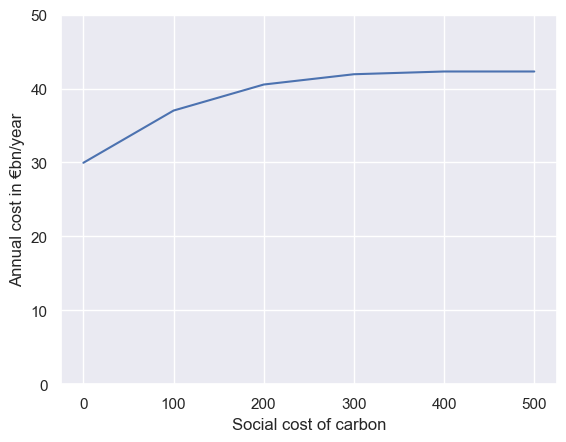

In [7]:

plt.plot(list_scc, list_social_cost)
plt.ylim(0, 50)
plt.ylabel("Annual cost in €bn/year")
plt.xlabel("Social cost of carbon")
plt.show()

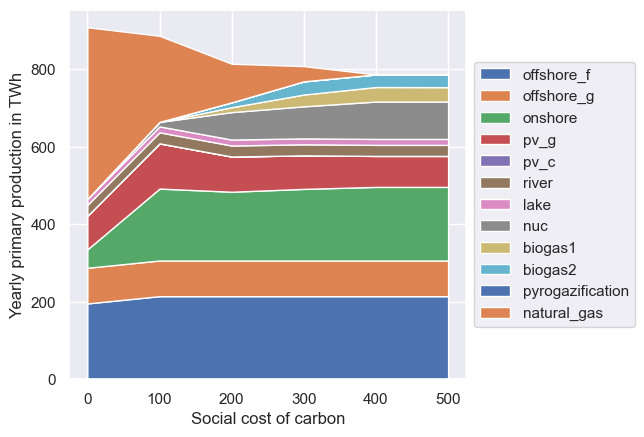

In [8]:
list_primary_production = np.transpose(np.array(list_primary_production)).tolist()

fig = plt.figure()
ax = plt.subplot(111)
ax.stackplot(list_scc, list_primary_production, labels=reindex_primary_prod)
ax.set_ylabel("Yearly primary production in TWh")
ax.set_xlabel("Social cost of carbon")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

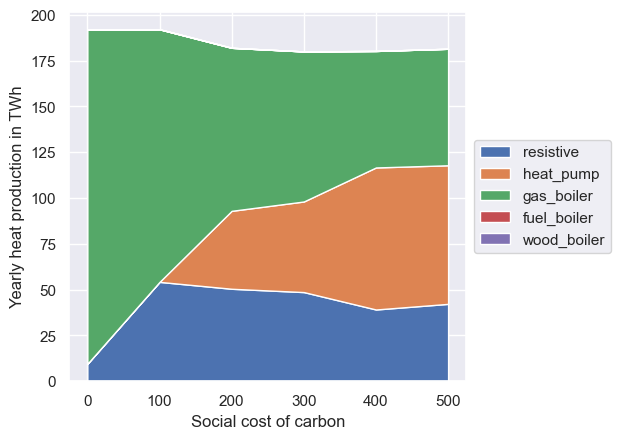

In [50]:
list_heat_generation = np.transpose(np.array(list_heat_generation)).tolist()

fig = plt.figure()
ax = plt.subplot(111)
ax.stackplot(list_scc, list_heat_generation, labels = reindex_heat_prod)
ax.set_ylabel("Yearly heat production in TWh")
ax.set_xlabel("Social cost of carbon")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [10]:
renovation_rate_df_plot = renovation_rate_df.copy()
renovation_rate_df_plot.index = list_scc
renovation_rate_df_plot = renovation_rate_df_plot.stack(level=[i for i in range(renovation_rate_df_plot.columns.nlevels)]).reset_index()
renovation_rate_df_plot["archetype"] = renovation_rate_df_plot.apply(lambda row: row["level_1"]+ ' ' + row["level_2"], axis=1)
renovation_rate_df_plot = renovation_rate_df_plot.rename(columns={"level_0": "scc", 0: "renovation_rate"})

In [19]:
df_heat = pd.DataFrame(dict_heat).stack(
    level=[i for i in range(pd.DataFrame(dict_heat).columns.nlevels)]).reset_index()
df_heat["archetype"] = df_heat.apply(lambda row: row["level_1"] + ' ' + row["level_2"], axis=1)  # should be changed depending on level of multiindex
df_heat = df_heat.rename(columns={"level_0": "date", 0: "heat_demand"})

df_heat

,date,level_1,level_2,heat_demand,archetype
0,0,A,Multi-family,0.004512,A Multi-family
1,0,B,Multi-family,0.337849,B Multi-family
2,0,B,Single-family,0.570088,B Single-family
3,0,C,Multi-family,2.146789,C Multi-family
4,0,C,Single-family,3.973689,C Single-family
...,...,...,...,...,...
113875,8759,E,Single-family,8.313301,E Single-family
113876,8759,F,Multi-family,1.408425,F Multi-family
113877,8759,F,Single-family,4.056723,F Single-family
113878,8759,G,Multi-family,0.713263,G Multi-family


In [38]:
renovation_rate_df_plot.groupby(["archetype", "scc"])["renovation_rate"].sum().reset_index()

,archetype,scc,renovation_rate
0,A Multi-family,0,0.0
1,A Multi-family,100,0.0
2,A Multi-family,200,0.0
3,A Multi-family,300,0.0
4,A Multi-family,400,0.0
...,...,...,...
73,G Single-family,100,0.0
74,G Single-family,200,0.0
75,G Single-family,300,0.0
76,G Single-family,400,0.0


In [49]:
df_heat.groupby("archetype")["heat_demand"].sum().reset_index()

,archetype,heat_demand
0,A Multi-family,17.034698
1,B Multi-family,1306.165087
2,B Single-family,2321.633220
3,C Multi-family,8618.771862
4,C Single-family,16629.810491
5,D Multi-family,19333.872073
6,D Single-family,40143.948425
7,E Multi-family,14681.404980
8,E Single-family,43595.906402
9,F Multi-family,7346.412307


In [40]:
heat_and_renov = pd.merge(renovation_rate_df_plot.groupby(["archetype", "scc"])["renovation_rate"].sum().reset_index(), df_heat.groupby("archetype")["heat_demand"].sum().reset_index(),
         on='archetype')
heat_and_renov

,archetype,scc,renovation_rate,heat_demand
0,A Multi-family,0,0.0,17.034698
1,A Multi-family,100,0.0,17.034698
2,A Multi-family,200,0.0,17.034698
3,A Multi-family,300,0.0,17.034698
4,A Multi-family,400,0.0,17.034698
...,...,...,...,...
73,G Single-family,100,0.0,12970.456883
74,G Single-family,200,0.0,12970.456883
75,G Single-family,300,0.0,12970.456883
76,G Single-family,400,0.0,12970.456883


In [46]:
renov = {}
for n, g in heat_and_renov.groupby('scc'):
    renov.update({n: (g["renovation_rate"] * g["heat_demand"]).sum() / g["heat_demand"].sum()})

In [47]:
renov

{0: 0.00034732503950658333,
 100: 0.0029096906679836826,
 200: 0.05260259647755768,
 300: 0.06240591181261243,
 400: 0.06240591181261243,
 500: 0.06240591181261243}

In [ ]:
heat_and_renov.groupby("scc").apply()

In [31]:
print(f'Total level of renovation: {(heat_and_renov["renovation_rate"] * heat_and_renov["heat_demand"]).sum()/heat_and_renov.heat_demand.sum()}')

Total level of renovation: 0.24307734762288521


In [16]:
renovation_rate_df_plot.sort_values(by="renovation_rate", ascending=False)

,scc,level_1,level_2,renovation_rate,archetype
44,300,D,Multi-family,0.322602,D Multi-family
31,200,D,Multi-family,0.322602,D Multi-family
57,400,D,Multi-family,0.322602,D Multi-family
70,500,D,Multi-family,0.322602,D Multi-family
33,200,E,Multi-family,0.225102,E Multi-family
...,...,...,...,...,...
34,200,E,Single-family,0.000000,E Single-family
36,200,F,Single-family,0.000000,F Single-family
37,200,G,Multi-family,0.000000,G Multi-family
38,200,G,Single-family,0.000000,G Single-family


In [48]:
linearized_renovation_costs

('A', 'Multi-family')_0       0.049938
('A', 'Multi-family')_1       0.299982
('A', 'Multi-family')_2       0.300695
('B', 'Multi-family')_0       0.722854
('B', 'Multi-family')_1      11.520285
('B', 'Multi-family')_2      30.607704
('B', 'Single-family')_0     21.312373
('B', 'Single-family')_1     41.937648
('B', 'Single-family')_2    103.093791
('C', 'Multi-family')_0      10.721958
('C', 'Multi-family')_1      84.209451
('C', 'Multi-family')_2     159.339855
('C', 'Single-family')_0     82.424445
('C', 'Single-family')_1    175.990409
('C', 'Single-family')_2    339.490787
('D', 'Multi-family')_0      22.288162
('D', 'Multi-family')_1     101.140153
('D', 'Multi-family')_2     222.342464
('D', 'Single-family')_0    216.038595
('D', 'Single-family')_1    472.362022
('D', 'Single-family')_2    926.572670
('E', 'Multi-family')_0      15.063999
('E', 'Multi-family')_1      30.726597
('E', 'Multi-family')_2     166.463474
('E', 'Single-family')_0     85.103834
('E', 'Single-family')_1 

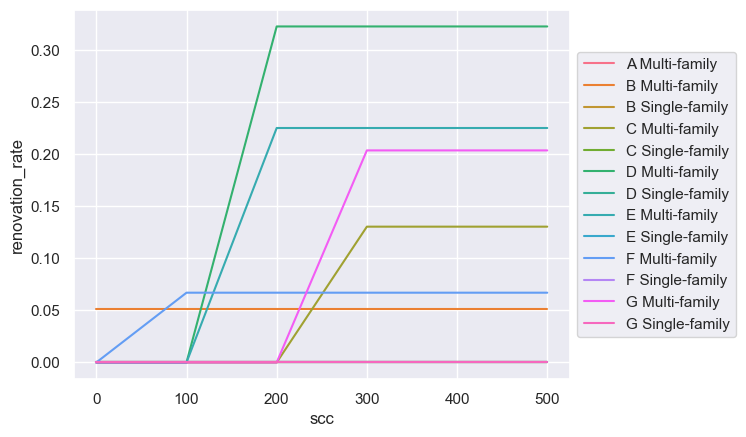

In [11]:
fig = plt.figure()
ax = plt.subplot(111)
sns.lineplot(renovation_rate_df_plot, x="scc", y="renovation_rate", hue="archetype")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='scc', ylabel='renovation_rate'>

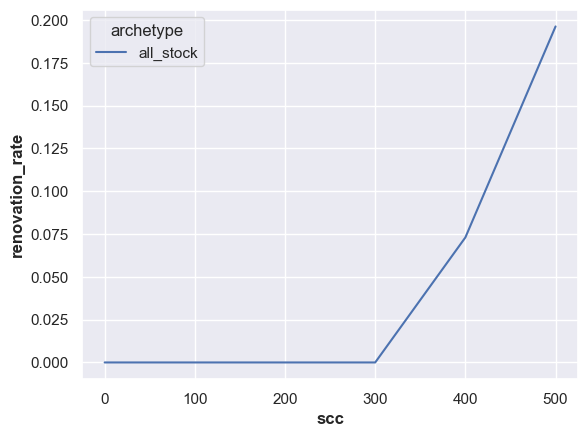

In [48]:
sns.lineplot(renovation_rate_df, x="scc", y="renovation_rate", hue="archetype")